<h1></t> User-Analytics-in-the-Telecommunication-Industry</h1>

In [241]:
# import all packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [242]:
#load data
df = pd.read_csv('../Data/Week1_challenge_data_source(CSV).csv', na_values=['?', None])
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [244]:
#list of columns in our dataframe
df.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

In [245]:
#changing Start and End columns to DateTime format
df['Start']=pd.to_datetime(df['Start'])
df['End']=pd.to_datetime(df['End'])

In [246]:
df.dtypes


Bearer Id                                          float64
Start                                       datetime64[ns]
Start ms                                           float64
End                                         datetime64[ns]
End ms                                             float64
Dur. (ms)                                          float64
IMSI                                               float64
MSISDN/Number                                      float64
IMEI                                               float64
Last Location Name                                  object
Avg RTT DL (ms)                                    float64
Avg RTT UL (ms)                                    float64
Avg Bearer TP DL (kbps)                            float64
Avg Bearer TP UL (kbps)                            float64
TCP DL Retrans. Vol (Bytes)                        float64
TCP UL Retrans. Vol (Bytes)                        float64
DL TP < 50 Kbps (%)                                float

In [247]:
df.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893173e+18,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,1.304243e+19,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,19710.750000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


In [248]:
# number of data points
print(f" The dataset have {df.shape[0]} rows and {df.shape[1]} columns")

 The dataset have 150001 rows and 55 columns


In [249]:
# how many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The Dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(df)

The Dataset contains 12.5 % missing values.


In [250]:
# Now which column(s) has missing values
df.isna().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [251]:
# drop columns with more than 30% missing values
df_clean = df.drop(['TCP DL Retrans. Vol (Bytes)', 
                    'TCP UL Retrans. Vol (Bytes)', 
                    'HTTP DL (Bytes)', 
                    'HTTP UL (Bytes)', 
                    'Nb of sec with 125000B < Vol DL',
                    'Nb of sec with 1250B < Vol UL < 6250B',
                    'Nb of sec with 31250B < Vol DL < 125000B',
                    'Nb of sec with 37500B < Vol UL',
                    'Nb of sec with 6250B < Vol DL < 31250B',
                    'Nb of sec with 6250B < Vol UL < 37500B',
                    ], axis=1)
df_clean.shape

(150001, 45)

In [252]:
# Now which column(s) has missing values
df_clean.isna().sum()

Bearer Id                           991
Start                                 1
Start ms                              1
End                                   1
End ms                                1
Dur. (ms)                             1
IMSI                                570
MSISDN/Number                      1066
IMEI                                572
Last Location Name                 1153
Avg RTT DL (ms)                   27829
Avg RTT UL (ms)                   27812
Avg Bearer TP DL (kbps)               1
Avg Bearer TP UL (kbps)               1
DL TP < 50 Kbps (%)                 754
50 Kbps < DL TP < 250 Kbps (%)      754
250 Kbps < DL TP < 1 Mbps (%)       754
DL TP > 1 Mbps (%)                  754
UL TP < 10 Kbps (%)                 792
10 Kbps < UL TP < 50 Kbps (%)       792
50 Kbps < UL TP < 300 Kbps (%)      792
UL TP > 300 Kbps (%)                792
Activity Duration DL (ms)             1
Activity Duration UL (ms)             1
Dur. (ms).1                           1


In [253]:
#drop rows which has missing values for Bearer Id,IMSI,MSISDN/Number
df_clean=df_clean.dropna(subset=['Bearer Id','IMSI','MSISDN/Number'])

In [254]:
df_clean.isna().sum()

Bearer Id                             0
Start                                 0
Start ms                              0
End                                   0
End ms                                0
Dur. (ms)                             0
IMSI                                  0
MSISDN/Number                         0
IMEI                                  0
Last Location Name                  160
Avg RTT DL (ms)                   27636
Avg RTT UL (ms)                   27616
Avg Bearer TP DL (kbps)               0
Avg Bearer TP UL (kbps)               0
DL TP < 50 Kbps (%)                 712
50 Kbps < DL TP < 250 Kbps (%)      712
250 Kbps < DL TP < 1 Mbps (%)       712
DL TP > 1 Mbps (%)                  712
UL TP < 10 Kbps (%)                 767
10 Kbps < UL TP < 50 Kbps (%)       767
50 Kbps < UL TP < 300 Kbps (%)      767
UL TP > 300 Kbps (%)                767
Activity Duration DL (ms)             0
Activity Duration UL (ms)             0
Dur. (ms).1                           0


In [255]:
#number of rows and columns 
df_clean.shape

(148506, 45)

In [256]:
# skewness along the index axis
df_clean.skew(axis = 0, skipna = True)

Bearer Id                           0.021237
Start ms                            0.000563
End ms                             -0.000781
Dur. (ms)                           3.968797
IMSI                             -269.349864
MSISDN/Number                     331.677128
IMEI                                1.068191
Avg RTT DL (ms)                    66.662058
Avg RTT UL (ms)                    28.622886
Avg Bearer TP DL (kbps)             2.589861
Avg Bearer TP UL (kbps)             4.499001
DL TP < 50 Kbps (%)                -2.301697
50 Kbps < DL TP < 250 Kbps (%)      3.281417
250 Kbps < DL TP < 1 Mbps (%)       4.576173
DL TP > 1 Mbps (%)                  5.358695
UL TP < 10 Kbps (%)                -8.995678
10 Kbps < UL TP < 50 Kbps (%)      10.959567
50 Kbps < UL TP < 300 Kbps (%)     21.857128
UL TP > 300 Kbps (%)               36.095001
Activity Duration DL (ms)           5.852521
Activity Duration UL (ms)           7.357988
Dur. (ms).1                         3.968797
Nb of sec 

In [257]:
#filling with the median

def fix_missing_median(df, col):
    df[col] = df[col].fillna(df_clean[col].median())
    return df[col]

def fix_missing_mode(df, col):
    df[col] = df[col].fillna(df_clean[col].mode()[0])
    return df[col]

#fill with median for skewed cols
columns_list=['Avg RTT DL (ms)',                 
                'Avg RTT UL (ms)',
                'DL TP < 50 Kbps (%)',            
                '50 Kbps < DL TP < 250 Kbps (%)',  
                '250 Kbps < DL TP < 1 Mbps (%)',  
                'DL TP > 1 Mbps (%)',               
                'UL TP < 10 Kbps (%)',           
                '10 Kbps < UL TP < 50 Kbps (%)',     
                '50 Kbps < UL TP < 300 Kbps (%)',  
                'UL TP > 300 Kbps (%)',
                'Nb of sec with Vol DL < 6250B' ,    
                'Nb of sec with Vol UL < 1250B']              
for col in columns_list:
    df_clean[col] = fix_missing_median(df_clean, col)


# fill with mode for catagorical columns
df_clean['Last Location Name'] = fix_missing_mode(df_clean, 'Last Location Name')


In [258]:
df_clean.isna().sum()

Bearer Id                         0
Start                             0
Start ms                          0
End                               0
End ms                            0
Dur. (ms)                         0
IMSI                              0
MSISDN/Number                     0
IMEI                              0
Last Location Name                0
Avg RTT DL (ms)                   0
Avg RTT UL (ms)                   0
Avg Bearer TP DL (kbps)           0
Avg Bearer TP UL (kbps)           0
DL TP < 50 Kbps (%)               0
50 Kbps < DL TP < 250 Kbps (%)    0
250 Kbps < DL TP < 1 Mbps (%)     0
DL TP > 1 Mbps (%)                0
UL TP < 10 Kbps (%)               0
10 Kbps < UL TP < 50 Kbps (%)     0
50 Kbps < UL TP < 300 Kbps (%)    0
UL TP > 300 Kbps (%)              0
Activity Duration DL (ms)         0
Activity Duration UL (ms)         0
Dur. (ms).1                       0
Handset Manufacturer              0
Handset Type                      0
Nb of sec with Vol DL < 6250

# Top 10 Handsets used by customers

In [259]:
df_clean['Handset Type'].value_counts()[0:10]

Huawei B528S-23A                19727
Apple iPhone 6S (A1688)          9395
Apple iPhone 6 (A1586)           8993
undefined                        8904
Apple iPhone 7 (A1778)           6279
Apple iPhone Se (A1723)          5165
Apple iPhone 8 (A1905)           4977
Apple iPhone Xr (A2105)          4556
Samsung Galaxy S8 (Sm-G950F)     4464
Apple iPhone X (A1901)           3806
Name: Handset Type, dtype: int64

# Top 3 Handset Manufacturers

In [260]:

df_clean['Handset Manufacturer'].value_counts()[0:3]

Apple      59339
Samsung    40429
Huawei     34296
Name: Handset Manufacturer, dtype: int64

In [261]:
# Row selection based on top 3 Handset manufacturers
df_top = df.loc[df['Handset Manufacturer'].isin(['Apple','Samsung','Huawei'])]

In [262]:
df_top1 = df.loc[df['Handset Manufacturer']=='Apple']
df_top2 = df.loc[df['Handset Manufacturer']=='Samsung']
df_top3 = df.loc[df['Handset Manufacturer']=='Huawei']

# Top 5 handsets per top 3 handset manufacturers

In [263]:

df_top['Handset Type'].value_counts()[0:5]

Huawei B528S-23A           19752
Apple iPhone 6S (A1688)     9419
Apple iPhone 6 (A1586)      9023
Apple iPhone 7 (A1778)      6326
Apple iPhone Se (A1723)     5187
Name: Handset Type, dtype: int64

# Top 5 handsets of apple

In [264]:

df_top1['Handset Type'].value_counts()[0:5]

Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: Handset Type, dtype: int64

# Top 5 handsets of samsung 

In [265]:

df_top2['Handset Type'].value_counts()[0:5]

Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: Handset Type, dtype: int64

# Top 5 handsets of Huawei

In [266]:

df_top3['Handset Type'].value_counts()[0:5]

Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: Handset Type, dtype: int64

In [267]:
Users = df_clean.groupby(['IMSI'])
xDR_users = df_clean['IMSI'].value_counts()
session_duration = Users['Dur. (ms)'].sum()
Total_session_UL = Users['Total UL (Bytes)'].sum()
Total_session_DL = Users['Total DL (Bytes)'].sum()
Total_Download_Social = Users['Social Media DL (Bytes)'].sum() + Users['Social Media UL (Bytes)'].sum()
Total_Download_Google = Users['Google DL (Bytes)'].sum() + Users['Google UL (Bytes)'].sum()
Total_Download_Email = Users['Email DL (Bytes)'].sum() + Users['Email UL (Bytes)'].sum()
Total_Download_Youtube = Users['Youtube DL (Bytes)'].sum() + Users['Youtube UL (Bytes)'].sum()
Total_Download_Netflix = Users['Netflix DL (Bytes)'].sum() + Users['Netflix UL (Bytes)'].sum()
Total_Download_Gaming = Users['Gaming DL (Bytes)'].sum() + Users['Gaming UL (Bytes)'].sum()
Total_Download_Other = Users['Other DL (Bytes)'].sum() + Users['Other DL (Bytes)'].sum()
df_new1 = pd.concat([xDR_users,
                 session_duration,
                 Total_session_UL,
                 Total_session_DL,
                 Total_Download_Social,
                 Total_Download_Google,
                 Total_Download_Email,
                 Total_Download_Youtube,
                 Total_Download_Netflix,
                 Total_Download_Gaming,
                 Total_Download_Other
                ], axis="columns", sort=True)

df_new1 = df_new1.rename(columns={0: 'Social media total volume'})
df_new1 = df_new1.rename(columns={1: 'Google total volume'})
df_new1 = df_new1.rename(columns={2: 'Email total volume'})
df_new1 = df_new1.rename(columns={3: 'Youtube total volume'})
df_new1 = df_new1.rename(columns={4: 'Netflix total volume'})
df_new1 = df_new1.rename(columns={5: 'Gaming total volume'})
df_new1 = df_new1.rename(columns={'Other DL (Bytes)': 'Other source total volume'})
df_new1 = df_new1.rename(columns={'IMSI': 'number of sessions'})
df_new1.index.name = 'Customer ID'
df_new1.reset_index(inplace=True)
df_new1.head()

,Customer ID,number of sessions,Dur. (ms),Total UL (Bytes),Total DL (Bytes),Social media total volume,Google total volume,Email total volume,Youtube total volume,Netflix total volume,Gaming total volume,Other source total volume
0,2.040471e+14,1,869844.0,60456049.0,78697597.0,1546088.0,9218647.0,3330974.0,40940710.0,28846230.0,43070260.0,7.783194e+08
1,2.040808e+14,1,877385.0,37295915.0,194828056.0,715224.0,10438660.0,1520771.0,11959905.0,26592300.0,178048738.0,9.353562e+08
2,2.082001e+14,1,86019.0,53794658.0,31376981.0,3122781.0,1624662.0,3657501.0,19882439.0,31830562.0,9124516.0,1.000089e+09
3,2.082001e+14,1,86254.0,33583272.0,392918313.0,2577104.0,13811478.0,3855734.0,25657632.0,27785852.0,344105897.0,6.018057e+08
4,2.082001e+14,2,573923.0,71325004.0,961767023.0,3426716.0,11665887.0,5564462.0,13840201.0,57343415.0,917684766.0,2.111738e+09


In [268]:

df_new1.describe()

,Customer ID,number of sessions,Dur. (ms),Total UL (Bytes),Total DL (Bytes),Social media total volume,Google total volume,Email total volume,Youtube total volume,Netflix total volume,Gaming total volume,Other source total volume
count,1.064700e+05,106470.000000,1.064700e+05,1.064700e+05,1.064700e+05,1.064700e+05,1.064700e+05,1.064700e+05,1.064700e+05,1.064700e+05,1.064700e+05,1.064700e+05
mean,2.082016e+14,1.394815,1.465729e+05,5.735394e+07,6.341724e+08,2.549815e+06,1.089081e+07,3.151151e+06,3.158202e+07,3.156348e+07,6.002642e+08,1.174860e+09
std,1.798517e+10,0.806998,1.865631e+05,3.569691e+07,4.649890e+08,1.909688e+06,7.552392e+06,2.224584e+06,2.131570e+07,2.130937e+07,4.495647e+08,8.882734e+08
min,2.040471e+14,1.000000,7.142000e+03,2.866892e+06,8.827082e+06,1.563000e+03,4.033000e+04,1.817600e+04,7.890300e+04,1.845690e+05,3.063580e+05,6.580000e+03
25%,2.082010e+14,1.000000,7.240250e+04,3.640221e+07,3.149852e+08,1.211961e+06,5.945747e+06,1.675397e+06,1.863620e+07,1.857016e+07,2.882425e+08,5.544342e+08
50%,2.082015e+14,1.000000,1.031375e+05,4.681314e+07,5.707337e+08,2.305230e+06,9.592756e+06,2.801152e+06,2.681640e+07,2.673120e+07,5.426925e+08,1.060426e+09
75%,2.082018e+14,2.000000,1.727990e+05,6.586156e+07,8.078465e+08,3.309046e+06,1.322321e+07,3.849029e+06,3.795792e+07,3.800261e+07,7.777097e+08,1.531335e+09
max,2.082522e+14,18.000000,1.855375e+07,7.295774e+08,8.156743e+09,4.337478e+07,1.521919e+08,4.241878e+07,4.529588e+08,3.995191e+08,7.749432e+09,1.605095e+10


In [269]:
#scaling


df_norm = (df_new1-df_new1.min())/(df_new1.max()-df_new1.min())

df_norm.head()

,Customer ID,number of sessions,Dur. (ms),Total UL (Bytes),Total DL (Bytes),Social media total volume,Google total volume,Email total volume,Youtube total volume,Netflix total volume,Gaming total volume,Other source total volume
0,0.000000,0.000000,0.046515,0.079246,0.008575,0.035610,0.060324,0.078131,0.090227,0.071774,0.005519,0.048490
1,0.008015,0.000000,0.046922,0.047377,0.022828,0.016454,0.068342,0.035438,0.026234,0.066129,0.022937,0.058274
2,0.987618,0.000000,0.004253,0.070080,0.002768,0.071962,0.010413,0.085832,0.043728,0.079247,0.001138,0.062307
3,0.987618,0.000000,0.004266,0.042268,0.047140,0.059381,0.090509,0.090507,0.056480,0.069118,0.044366,0.037493
4,0.987618,0.058824,0.030560,0.094203,0.116955,0.078969,0.076408,0.130807,0.030386,0.143135,0.118385,0.131564


In [270]:
#function for handling outliers
def fix_outlier(df, column):
    df[column] = np.where(df[column] > df[column].quantile(0.95), df[column].median(),df[column])
    
    return df[column]

In [271]:
#handling outliers
cols=['number of sessions',
      'Dur. (ms)',
      'Total UL (Bytes)',
      'Total DL (Bytes)',
      'Social media total volume',
      'Google total volume',
      'Email total volume',
      'Youtube total volume',
      'Netflix total volume',
      'Gaming total volume',
      'Other source total volume']              
for col in cols:
    df_norm[col] = fix_outlier(df_norm, col)
    
df_norm.head()


,Customer ID,number of sessions,Dur. (ms),Total UL (Bytes),Total DL (Bytes),Social media total volume,Google total volume,Email total volume,Youtube total volume,Netflix total volume,Gaming total volume,Other source total volume
0,0.000000,0.000000,0.005176,0.079246,0.008575,0.035610,0.060324,0.078131,0.090227,0.071774,0.005519,0.048490
1,0.008015,0.000000,0.005176,0.047377,0.022828,0.016454,0.068342,0.035438,0.026234,0.066129,0.022937,0.058274
2,0.987618,0.000000,0.004253,0.070080,0.002768,0.071962,0.010413,0.085832,0.043728,0.079247,0.001138,0.062307
3,0.987618,0.000000,0.004266,0.042268,0.047140,0.059381,0.090509,0.090507,0.056480,0.069118,0.044366,0.037493
4,0.987618,0.058824,0.005176,0.094203,0.116955,0.078969,0.076408,0.130807,0.030386,0.143135,0.118385,0.131564


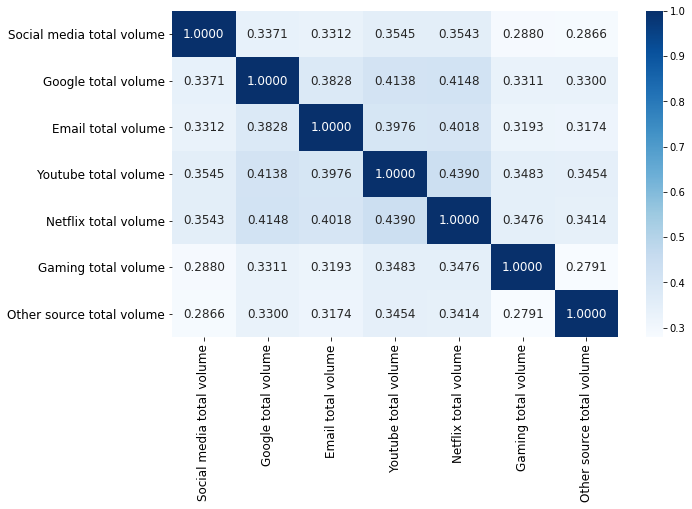

In [272]:
#correlation matrix
new=df_norm[['Social media total volume',
                'Google total volume',
                'Email total volume',
                'Youtube total volume',
                'Netflix total volume',
                'Gaming total volume',
                'Other source total volume']]

corrMatrix = new.corr()
f, ax = plt.subplots(figsize=(10, 6))
res=sns.heatmap(corrMatrix,cmap="Blues",annot=True,fmt='.4f',annot_kws={"size":12})
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 12)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 12)
plt.show()

# univariate plots

<AxesSubplot:xlabel='Dur. (ms)', ylabel='Count'>

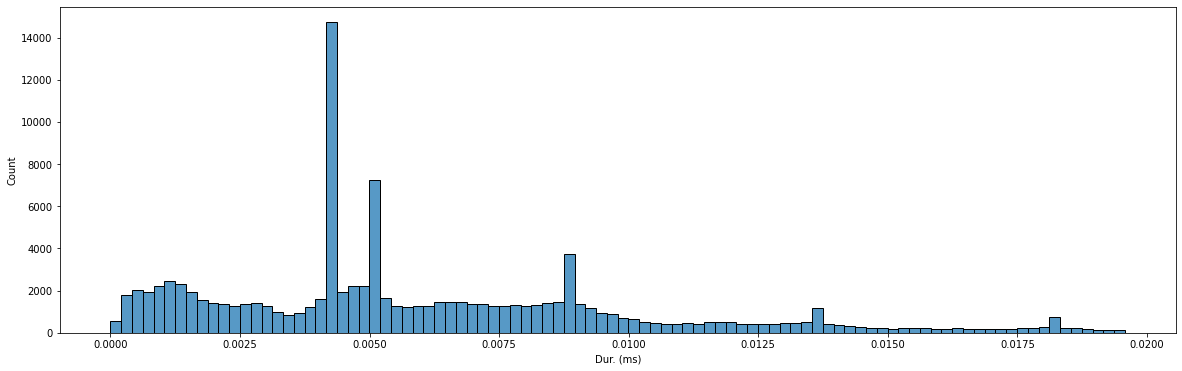

In [273]:

plt.subplots(figsize=(20, 6))
sns.histplot(df_norm['Dur. (ms)'])


Text(0.5, 1.0, 'Total DL (Bytes)')

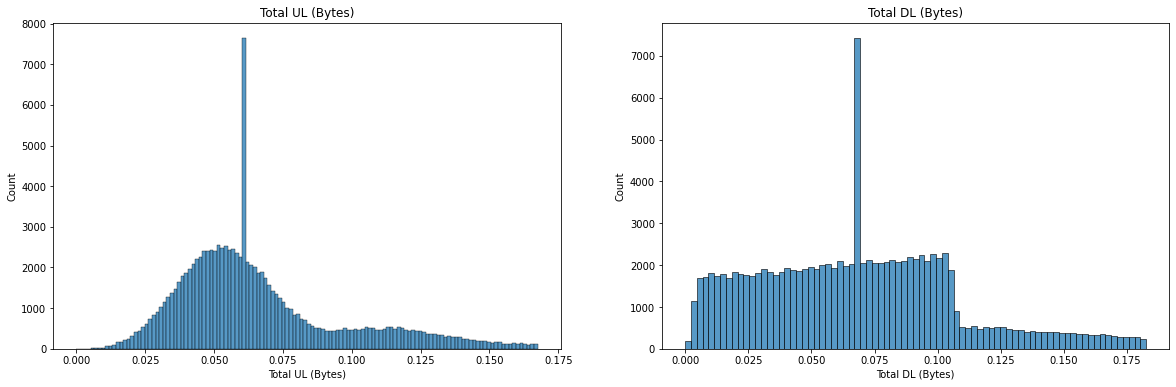

In [274]:
 # univariate plots
fig, ax=plt.subplots(1,2, figsize=(20, 6))
sns.histplot(df_norm['Total UL (Bytes)'], ax=ax[0])
ax[0].set_title("Total UL (Bytes)")
sns.histplot(df_norm['Total DL (Bytes)'], ax=ax[1])
ax[1].set_title("Total DL (Bytes)")


Text(0.5, 1.0, 'Google total volume')

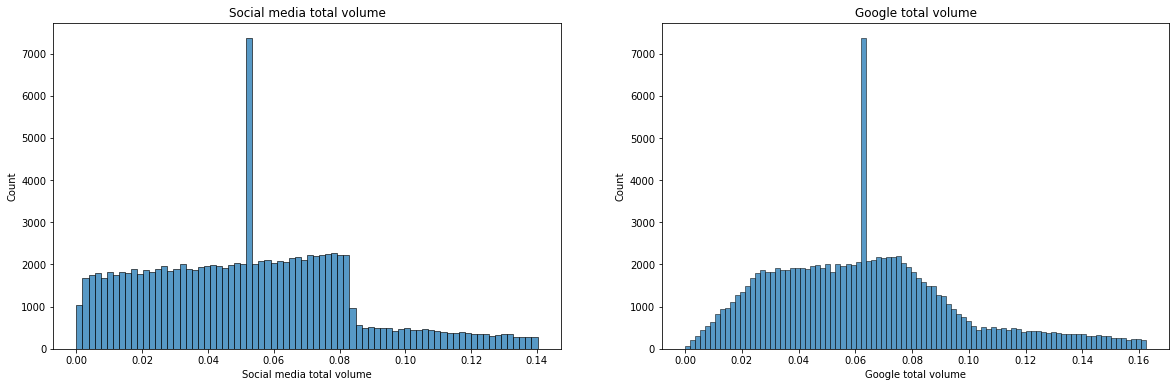

In [275]:
 # univariate plots
fig, ax=plt.subplots(1,2, figsize=(20, 6))
sns.histplot(df_norm['Social media total volume'], ax=ax[0])
ax[0].set_title("Social media total volume")
sns.histplot(df_norm['Google total volume'], ax=ax[1])
ax[1].set_title("Google total volume")


Text(0.5, 1.0, 'Youtube total volume')

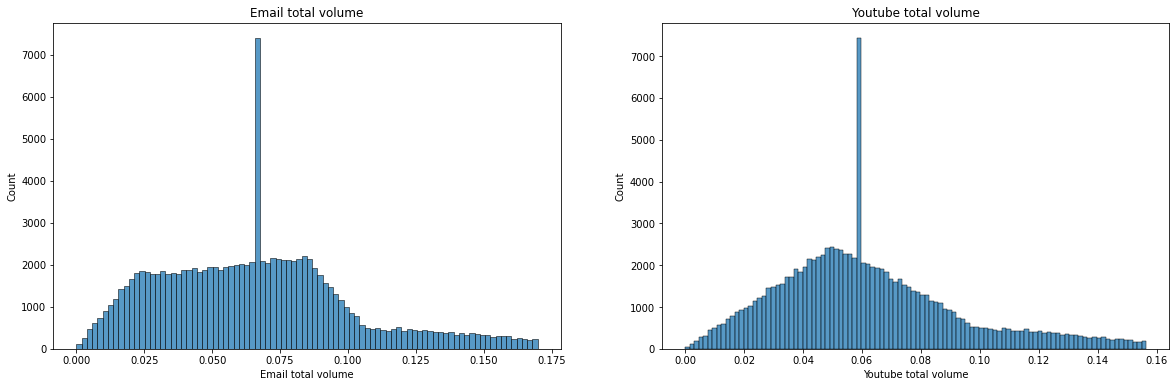

In [276]:
 # univariate plots
fig, ax=plt.subplots(1,2, figsize=(20, 6))
sns.histplot(df_norm['Email total volume'], ax=ax[0])
ax[0].set_title("Email total volume")
sns.histplot(df_norm['Youtube total volume'], ax=ax[1])
ax[1].set_title("Youtube total volume")


Text(0.5, 1.0, 'Gaming total volume')

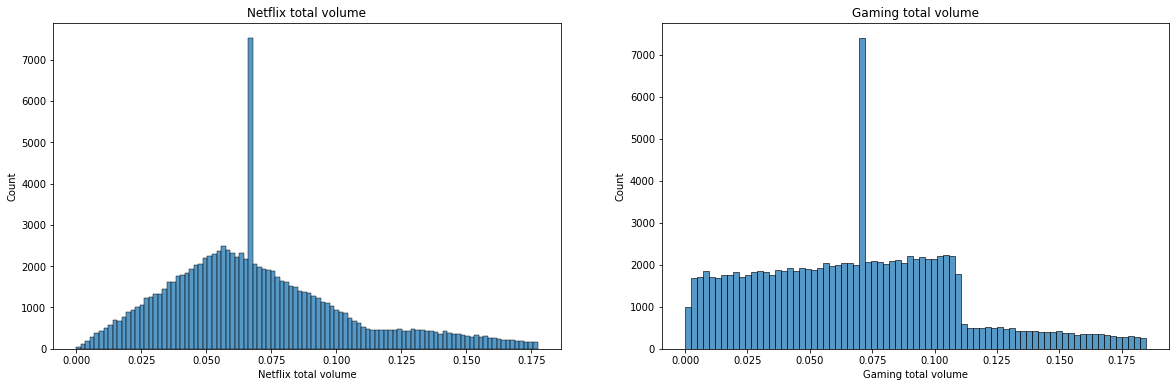

In [277]:
 # univariate plots
fig, ax=plt.subplots(1,2, figsize=(20, 6))
sns.histplot(df_norm['Netflix total volume'], ax=ax[0])
ax[0].set_title("Netflix total volume")

sns.histplot(df_norm['Gaming total volume'], ax=ax[1])
ax[1].set_title("Gaming total volume")


In [278]:

df_norm['Total_DL+UL'] = df_norm['Total UL (Bytes)'] + df_norm['Total DL (Bytes)']


# bivariate analysis

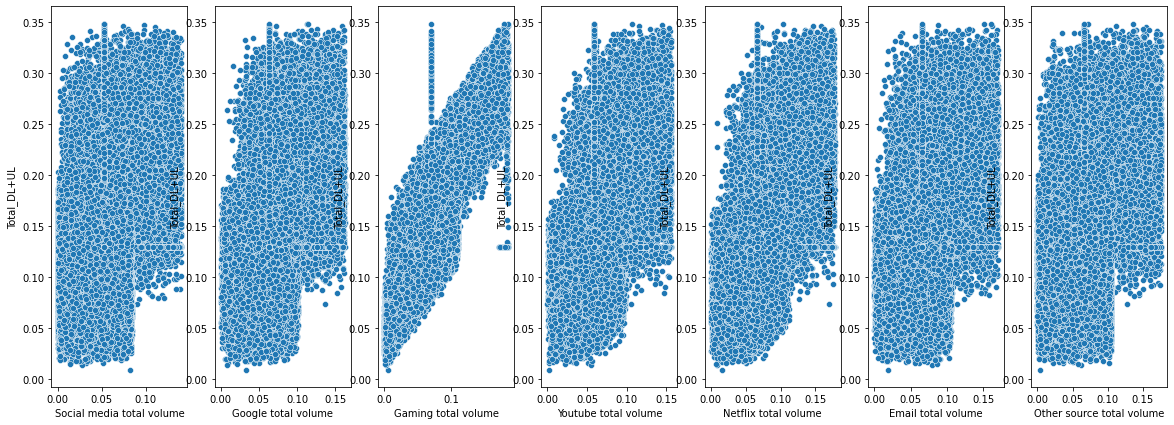

In [279]:
#Scatter plot for social media total, gaming total,google total,Youtube total volume,Netflix total volume,Email total volume,Other source total volume for comparasion
a4_dims = (20, 7)
fig, axs = plt.subplots(ncols=7,figsize=a4_dims)
sns.scatterplot(x="Social media total volume", y="Total_DL+UL",ax=axs[0], data=df_norm)
sns.scatterplot(x="Google total volume", y="Total_DL+UL", ax=axs[1],data=df_norm)
sns.scatterplot(x="Gaming total volume", y="Total_DL+UL",ax=axs[2], data=df_norm)
sns.scatterplot(x="Youtube total volume", y="Total_DL+UL",ax=axs[3], data=df_norm)
sns.scatterplot(x="Netflix total volume", y="Total_DL+UL",ax=axs[4], data=df_norm)
sns.scatterplot(x="Email total volume", y="Total_DL+UL",ax=axs[5], data=df_norm)
sns.scatterplot(x="Other source total volume", y="Total_DL+UL",ax=axs[6], data=df_norm)
plt.show()

<h3>Top five decile classes based on the total duration for all sessions<br>
    and total data (DL+UL) per decile class.<h3>

In [280]:
df_norm['decile'] = pd.qcut(df_norm['Dur. (ms)'], 5, labels=False)

In [281]:
df_norm.head()

,Customer ID,number of sessions,Dur. (ms),Total UL (Bytes),Total DL (Bytes),Social media total volume,Google total volume,Email total volume,Youtube total volume,Netflix total volume,Gaming total volume,Other source total volume,Total_DL+UL,decile
0,0.000000,0.000000,0.005176,0.079246,0.008575,0.035610,0.060324,0.078131,0.090227,0.071774,0.005519,0.048490,0.087822,2
1,0.008015,0.000000,0.005176,0.047377,0.022828,0.016454,0.068342,0.035438,0.026234,0.066129,0.022937,0.058274,0.070205,2
2,0.987618,0.000000,0.004253,0.070080,0.002768,0.071962,0.010413,0.085832,0.043728,0.079247,0.001138,0.062307,0.072847,1
3,0.987618,0.000000,0.004266,0.042268,0.047140,0.059381,0.090509,0.090507,0.056480,0.069118,0.044366,0.037493,0.089408,1
4,0.987618,0.058824,0.005176,0.094203,0.116955,0.078969,0.076408,0.130807,0.030386,0.143135,0.118385,0.131564,0.211158,2


In [282]:
total_data_per_decile = df_norm.groupby(['decile']).agg({'Total_DL+UL':['sum']})
total_data_per_decile.columns = ["_".join(x) for x in total_data_per_decile.columns.ravel()]

In [283]:
total_data_per_decile

,Total_DL+UL_sum
decile,
0,2489.453709
1,2677.176714
2,2755.326170
3,2839.446507
4,3551.913199


In [284]:
df_new1['Total_DL+UL'] = df_new1['Total UL (Bytes)'] + df_new1['Total DL (Bytes)']


In [285]:
df_new1.head()

,Customer ID,number of sessions,Dur. (ms),Total UL (Bytes),Total DL (Bytes),Social media total volume,Google total volume,Email total volume,Youtube total volume,Netflix total volume,Gaming total volume,Other source total volume,Total_DL+UL
0,2.040471e+14,1,869844.0,60456049.0,78697597.0,1546088.0,9218647.0,3330974.0,40940710.0,28846230.0,43070260.0,7.783194e+08,1.391536e+08
1,2.040808e+14,1,877385.0,37295915.0,194828056.0,715224.0,10438660.0,1520771.0,11959905.0,26592300.0,178048738.0,9.353562e+08,2.321240e+08
2,2.082001e+14,1,86019.0,53794658.0,31376981.0,3122781.0,1624662.0,3657501.0,19882439.0,31830562.0,9124516.0,1.000089e+09,8.517164e+07
3,2.082001e+14,1,86254.0,33583272.0,392918313.0,2577104.0,13811478.0,3855734.0,25657632.0,27785852.0,344105897.0,6.018057e+08,4.265016e+08
4,2.082001e+14,2,573923.0,71325004.0,961767023.0,3426716.0,11665887.0,5564462.0,13840201.0,57343415.0,917684766.0,2.111738e+09,1.033092e+09


# TOP 10 customers based on sessions frequency 

In [286]:


df_new1.sort_values(by='number of sessions', ascending=False)[['Customer ID','number of sessions']].head(10).sort_values(by='number of sessions', ascending=False)[['Customer ID','number of sessions']].head(10)

,Customer ID,number of sessions
36490,2.082014e+14,18
71319,2.082017e+14,17
15750,2.082010e+14,17
87549,2.082019e+14,16
25038,2.082010e+14,15
100322,2.082021e+14,15
10448,2.082009e+14,13
84007,2.082018e+14,12
89424,2.082019e+14,12
2941,2.082003e+14,12


# TOP 10 customers based on the duration of the session 


In [287]:


df_new1.sort_values(by='Dur. (ms)', ascending=False)[['Customer ID','Dur. (ms)']].head(10)

,Customer ID,Dur. (ms)
15750,2.082010e+14,18553754.0
71319,2.082017e+14,9966898.0
100322,2.082021e+14,9279434.0
36490,2.082014e+14,8791927.0
10448,2.082009e+14,8744914.0
21632,2.082010e+14,6614270.0
36888,2.082014e+14,6288730.0
89038,2.082019e+14,6287761.0
33901,2.082014e+14,5649882.0
2941,2.082003e+14,5321667.0


# TOP 10 customers based on the sessions total traffic (download and upload (bytes))

In [288]:

df_new1.sort_values(by='Total_DL+UL', ascending=False)[['Customer ID','Total_DL+UL']].head(10)


,Customer ID,Total_DL+UL
71319,2.082017e+14,8.846226e+09
100322,2.082021e+14,8.514774e+09
15750,2.082010e+14,8.499621e+09
36490,2.082014e+14,7.971167e+09
25038,2.082010e+14,7.891111e+09
87549,2.082019e+14,7.705863e+09
35121,2.082014e+14,7.308501e+09
2941,2.082003e+14,7.132371e+09
61844,2.082017e+14,6.872018e+09
49439,2.082015e+14,6.540899e+09


In [289]:
df_engagement=df_norm[['Customer ID','number of sessions','Dur. (ms)','Total_DL+UL']]

In [290]:
df_engagement.head()

,Customer ID,number of sessions,Dur. (ms),Total_DL+UL
0,0.000000,0.000000,0.005176,0.087822
1,0.008015,0.000000,0.005176,0.070205
2,0.987618,0.000000,0.004253,0.072847
3,0.987618,0.000000,0.004266,0.089408
4,0.987618,0.058824,0.005176,0.211158


In [291]:
# k means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
df_engagement['cluster'] = kmeans.fit_predict(df_engagement[['number of sessions', 'Dur. (ms)','Total_DL+UL']])
df_engagement.head(10)

,Customer ID,number of sessions,Dur. (ms),Total_DL+UL,cluster
0,0.000000,0.000000,0.005176,0.087822,2
1,0.008015,0.000000,0.005176,0.070205,2
2,0.987618,0.000000,0.004253,0.072847,2
3,0.987618,0.000000,0.004266,0.089408,2
4,0.987618,0.058824,0.005176,0.211158,0
5,0.987618,0.000000,0.000361,0.130619,1
6,0.987618,0.058824,0.005176,0.201186,0
7,0.987618,0.058824,0.012127,0.166056,0
8,0.987618,0.000000,0.004273,0.083195,2
9,0.987618,0.000000,0.006967,0.106576,2


In [292]:
#grouping
df_engagement.groupby(['cluster']).describe().transpose()

cluster                              0             1             2
Customer ID        count  23173.000000  4.382300e+04  39474.000000
                   mean       0.987988  9.879892e-01      0.987938
                   std        0.000316  3.281775e-04      0.007012
                   min        0.987618  9.876182e-01      0.000000
                   25%        0.987927  9.878343e-01      0.987834
                   50%        0.987962  9.879619e-01      0.987962
                   75%        0.988015  9.880155e-01      0.988015
                   max        0.989937  1.000000e+00      0.989937
number of sessions count  23173.000000  4.382300e+04  39474.000000
                   mean       0.068942  3.975887e-03      0.000201
                   std        0.024781  1.486854e-02      0.003608
                   min        0.000000  0.000000e+00      0.000000
                   25%        0.058824  0.000000e+00      0.000000
                   50%        0.058824  0.000000e+00      0.000000
                   75%        0.058824  0.000000e+00      0.000000
                   max        0.117647  1.176471e-01      0.117647
Dur. (ms)          count  23173.000000  4.382300e+04  39474.000000
                   mean       0.008928  5.520805e-03      0.005048
                   std        0.004643  3.849756e-03      0.003341
                   min        0.000598  2.156728e-07      0.000000
                   25%        0.005176  2.973562e-03      0.002589
                   50%        0.008932  4.652979e-03      0.004273
                   75%        0.012590  7.376927e-03      0.006980
                   max        0.019575  1.956697e-02      0.019499
Total_DL+UL        count  23173.000000  4.382300e+04  39474.000000
                   mean       0.223300  1.365755e-01      0.079891
                   std        0.041811  1.802329e-02      0.018654
                   min        0.119355  1.009494e-01      0.009076
                   25%        0.193992  1.224820e-01      0.066912
                   50%        0.222229  1.335147e-01      0.081999
                   75%        0.250367  1.491441e-01      0.095253
                   max        0.348426  2.071473e-01      0.108427

In [293]:
df_new1.head()

,Customer ID,number of sessions,Dur. (ms),Total UL (Bytes),Total DL (Bytes),Social media total volume,Google total volume,Email total volume,Youtube total volume,Netflix total volume,Gaming total volume,Other source total volume,Total_DL+UL
0,2.040471e+14,1,869844.0,60456049.0,78697597.0,1546088.0,9218647.0,3330974.0,40940710.0,28846230.0,43070260.0,7.783194e+08,1.391536e+08
1,2.040808e+14,1,877385.0,37295915.0,194828056.0,715224.0,10438660.0,1520771.0,11959905.0,26592300.0,178048738.0,9.353562e+08,2.321240e+08
2,2.082001e+14,1,86019.0,53794658.0,31376981.0,3122781.0,1624662.0,3657501.0,19882439.0,31830562.0,9124516.0,1.000089e+09,8.517164e+07
3,2.082001e+14,1,86254.0,33583272.0,392918313.0,2577104.0,13811478.0,3855734.0,25657632.0,27785852.0,344105897.0,6.018057e+08,4.265016e+08
4,2.082001e+14,2,573923.0,71325004.0,961767023.0,3426716.0,11665887.0,5564462.0,13840201.0,57343415.0,917684766.0,2.111738e+09,1.033092e+09


# top 10 most engaged users on social media

In [294]:


df_new1.sort_values(by='Social media total volume', ascending=False)[['Customer ID','Social media total volume']].head(10)

,Customer ID,Social media total volume
36490,2.082014e+14,43374779.0
100322,2.082021e+14,39783189.0
87549,2.082019e+14,35412358.0
71319,2.082017e+14,28294544.0
15750,2.082010e+14,27135500.0
10448,2.082009e+14,24247850.0
73313,2.082017e+14,23974919.0
80933,2.082018e+14,23800834.0
89038,2.082019e+14,23077825.0
87161,2.082019e+14,23000066.0


# top 10 most engaged users on Google

In [295]:


df_new1.sort_values(by='Google total volume', ascending=False)[['Customer ID','Google total volume']].head(10)

,Customer ID,Google total volume
36490,2.082014e+14,152191852.0
15750,2.082010e+14,142307915.0
71319,2.082017e+14,127973787.0
100322,2.082021e+14,123223099.0
87549,2.082019e+14,116516345.0
73313,2.082017e+14,110254484.0
25038,2.082010e+14,109860502.0
10448,2.082009e+14,105032696.0
101271,2.082021e+14,97089988.0
36095,2.082014e+14,91935151.0


# top 10 most engaged users on Email

In [296]:


df_new1.sort_values(by='Email total volume', ascending=False)[['Customer ID','Email total volume']].head(10)

,Customer ID,Email total volume
36490,2.082014e+14,42418782.0
71319,2.082017e+14,40788634.0
15750,2.082010e+14,40633966.0
73313,2.082017e+14,36310123.0
87549,2.082019e+14,35999792.0
100322,2.082021e+14,33693767.0
25038,2.082010e+14,31514421.0
15984,2.082010e+14,30417885.0
10448,2.082009e+14,30335796.0
49439,2.082015e+14,29059042.0


# top 10 most engaged users on Youtube

In [297]:


df_new1.sort_values(by='Youtube total volume', ascending=False)[['Customer ID','Youtube total volume']].head(10)

,Customer ID,Youtube total volume
15750,2.082010e+14,452958769.0
100322,2.082021e+14,396289198.0
71319,2.082017e+14,394370218.0
36490,2.082014e+14,374483047.0
25038,2.082010e+14,317410572.0
10448,2.082009e+14,315231310.0
84007,2.082018e+14,308790774.0
2941,2.082003e+14,303169107.0
49439,2.082015e+14,302661958.0
89038,2.082019e+14,284090139.0


# top 10 most engaged users on Netflix

In [298]:


df_new1.sort_values(by='Netflix total volume', ascending=False)[['Customer ID','Netflix total volume']].head(10)

,Customer ID,Netflix total volume
87549,2.082019e+14,399519079.0
71319,2.082017e+14,361401046.0
15750,2.082010e+14,356980607.0
100322,2.082021e+14,334643269.0
36490,2.082014e+14,328725740.0
2941,2.082003e+14,318347546.0
10448,2.082009e+14,313939488.0
25038,2.082010e+14,309093159.0
73313,2.082017e+14,305939790.0
101271,2.082021e+14,292091341.0


# top 10 most engaged users on Gaming


In [299]:


df_new1.sort_values(by='Gaming total volume', ascending=False)[['Customer ID','Gaming total volume']].head(10)

,Customer ID,Gaming total volume
71319,2.082017e+14,7.749432e+09
100322,2.082021e+14,7.461045e+09
15750,2.082010e+14,7.326673e+09
25038,2.082010e+14,6.970568e+09
36490,2.082014e+14,6.887572e+09
87549,2.082019e+14,6.725559e+09
35121,2.082014e+14,6.646303e+09
2941,2.082003e+14,6.268620e+09
61844,2.082017e+14,6.103856e+09
49439,2.082015e+14,5.753743e+09


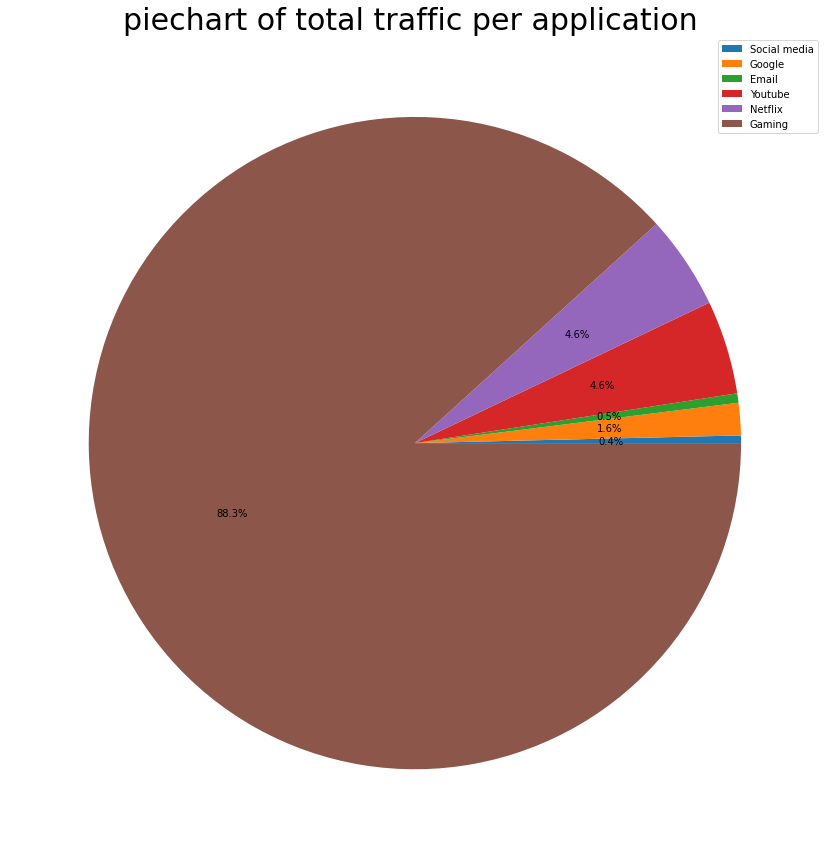

In [300]:
labels = ['Social media', 'Google', 'Email','Youtube','Netflix','Gaming']
sizes = [df_new1['Social media total volume'].sum(),
         df_new1['Google total volume'].sum(),
         df_new1['Email total volume'].sum(),
         df_new1['Youtube total volume'].sum(),
         df_new1['Netflix total volume'].sum(),
         df_new1['Gaming total volume'].sum(),
         
        ]

fig1, ax1 = plt.subplots(figsize = (15, 15))
ax1.pie(sizes, autopct='%1.1f%%', startangle=0)
ax1.set_title('piechart of total traffic per application ',fontsize = 30)
ax1.legend(labels)
plt.show()


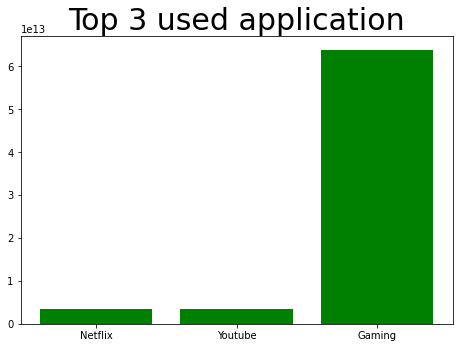

In [301]:
sizes.sort()
top3 = sizes[3:]
labels=['Netflix','Youtube','Gaming']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.title("Top 3 used application", color='Black',fontsize = 30)
ax.bar(labels,top3,color='Green')
plt.show()

In [302]:
df_cls1=df_engagement.copy()

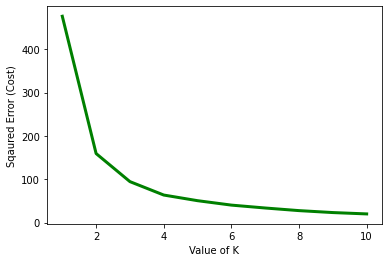

In [303]:
#k-Means clustering using elbow method
cost =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state=0)
    df_cls1['cluster'] = kmeans.fit_predict(df_cls1[['number of sessions', 'Dur. (ms)','Total_DL+UL']])

    cost.append(kmeans.inertia_)     
  
# plot the cost against K values
plt.plot(range(1, 11), cost, color ='g', linewidth ='3')
plt.xlabel("Value of K")
plt.ylabel("Sqaured Error (Cost)")
plt.show()

In [304]:
#create the new data for customer experience

df_cl = df[['IMSI',
             'Bearer Id',
             'MSISDN/Number',
             'Avg RTT DL (ms)',
             'Avg RTT UL (ms)',
             'TCP DL Retrans. Vol (Bytes)',
             'TCP UL Retrans. Vol (Bytes)',
             'Handset Type',
             'Avg Bearer TP DL (kbps)',
             'Avg Bearer TP UL (kbps)']]
df_cl.head()

,IMSI,Bearer Id,MSISDN/Number,Avg RTT DL (ms),Avg RTT UL (ms),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Handset Type,Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps)
0,2.082014e+14,1.311448e+19,3.366496e+10,42.0,5.0,NaN,NaN,Samsung Galaxy A5 Sm-A520F,23.0,44.0
1,2.082019e+14,1.311448e+19,3.368185e+10,65.0,5.0,NaN,NaN,Samsung Galaxy J5 (Sm-J530),16.0,26.0
2,2.082003e+14,1.311448e+19,3.376063e+10,NaN,NaN,NaN,NaN,Samsung Galaxy A8 (2018),6.0,9.0
3,2.082014e+14,1.311448e+19,3.375034e+10,NaN,NaN,NaN,NaN,undefined,44.0,44.0
4,2.082014e+14,1.311448e+19,3.369980e+10,NaN,NaN,NaN,NaN,Samsung Sm-G390F,6.0,9.0


In [305]:
df_cl=df_cl.dropna(subset=['Bearer Id'])
df_cl=df_cl.dropna(subset=['IMSI'])
df_cl=df_cl.dropna(subset=['MSISDN/Number'])

In [306]:
df_experience  = df_cl[['IMSI',
             'Avg RTT DL (ms)',
             'Avg RTT UL (ms)',
             'TCP DL Retrans. Vol (Bytes)',
             'TCP UL Retrans. Vol (Bytes)',
             'Handset Type',
             'Avg Bearer TP DL (kbps)',
             'Avg Bearer TP UL (kbps)']]

In [307]:
df_experience.head()

,IMSI,Avg RTT DL (ms),Avg RTT UL (ms),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Handset Type,Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps)
0,2.082014e+14,42.0,5.0,NaN,NaN,Samsung Galaxy A5 Sm-A520F,23.0,44.0
1,2.082019e+14,65.0,5.0,NaN,NaN,Samsung Galaxy J5 (Sm-J530),16.0,26.0
2,2.082003e+14,NaN,NaN,NaN,NaN,Samsung Galaxy A8 (2018),6.0,9.0
3,2.082014e+14,NaN,NaN,NaN,NaN,undefined,44.0,44.0
4,2.082014e+14,NaN,NaN,NaN,NaN,Samsung Sm-G390F,6.0,9.0


In [308]:
#which columns has missing values
df_experience.isna().sum()

IMSI                               0
Avg RTT DL (ms)                27636
Avg RTT UL (ms)                27616
TCP DL Retrans. Vol (Bytes)    87764
TCP UL Retrans. Vol (Bytes)    96128
Handset Type                       0
Avg Bearer TP DL (kbps)            0
Avg Bearer TP UL (kbps)            0
dtype: int64

In [309]:
df_experience=df_experience.dropna(subset=['IMSI'])

In [310]:
cols = ['Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)']
for col in cols:
    df_experience[col] = fix_missing_median(df_experience, col)
df_experience["Handset Type"] = fix_missing_mode(df_experience,"Handset Type")

In [311]:
df_experience['TCP DL Retrans. Vol (Bytes)']=df_experience['TCP DL Retrans. Vol (Bytes)'].fillna(df_experience['TCP DL Retrans. Vol (Bytes)'].mean())
df_experience['TCP UL Retrans. Vol (Bytes)']=df_experience['TCP UL Retrans. Vol (Bytes)'].fillna(df_experience['TCP UL Retrans. Vol (Bytes)'].mean())


In [312]:
df_experience.isna().sum()

IMSI                           0
Avg RTT DL (ms)                0
Avg RTT UL (ms)                0
TCP DL Retrans. Vol (Bytes)    0
TCP UL Retrans. Vol (Bytes)    0
Handset Type                   0
Avg Bearer TP DL (kbps)        0
Avg Bearer TP UL (kbps)        0
dtype: int64

In [313]:
Users1 = df_experience.groupby(['IMSI'])
Average_RTT = Users1['Avg RTT DL (ms)'].sum() + Users1['Avg RTT UL (ms)'].sum()
Average_TCP = Users1['TCP DL Retrans. Vol (Bytes)'].sum()+Users1['TCP UL Retrans. Vol (Bytes)'].sum()
Average_TP= Users1['Avg Bearer TP DL (kbps)'].sum()+Users1['Avg Bearer TP UL (kbps)'].sum()
Handset_type = Users1['Handset Type'].first()
df_exp= pd.concat([Average_RTT,
                  Average_TCP,
                  Average_TP,
                 Handset_type
                ], axis="columns", sort=True)
df_exp = df_exp.rename(columns={0: 'Average_RTT'})
df_exp = df_exp.rename(columns={1: 'Average_TCP'})
df_exp= df_exp.rename(columns={2: 'Average_Throughput'})
df_exp = df_exp.rename(columns={3: 'Handset_type'})
df_exp.index.name = 'Customer ID'
df_exp.reset_index(inplace=True)

In [314]:
df_exp.head()

,Customer ID,Average_RTT,Average_TCP,Average_Throughput,Handset Type
0,2.040471e+14,50.0,2.177786e+07,2.0,Quectel Wireless. Quectel Ec21-E
1,2.040808e+14,50.0,2.177786e+07,1.0,Quectel Wireless. Quectel Ec25-E
2,2.082001e+14,303.0,7.737488e+05,109.0,Dn Electronics Danew Konnect 350
3,2.082001e+14,84.0,2.797900e+04,754.0,Samsung Galaxy Grand (Gt-I9060X)
4,2.082001e+14,184.0,4.355572e+07,161.0,Apple iPhone 6S (A1688)


In [315]:
#top 10 TCP values in the dataset. 

df_exp.sort_values(by='Average_TCP', ascending=False)[['Customer ID','Average_TCP']].head(10)

,Customer ID,Average_TCP
82799,2.082018e+14,8.354209e+09
11167,2.082009e+14,7.941860e+09
80932,2.082018e+14,7.374910e+09
82084,2.082018e+14,6.043978e+09
11172,2.082009e+14,5.879989e+09
80845,2.082018e+14,5.593366e+09
27581,2.082014e+14,5.566929e+09
11076,2.082009e+14,5.195993e+09
82576,2.082018e+14,5.179459e+09
75590,2.082017e+14,5.165857e+09


In [316]:
#bottom 10 TCP values in the dataset. 

df_exp.sort_values(by='Average_TCP', ascending=False)[['Customer ID','Average_TCP']].tail(10)

,Customer ID,Average_TCP
101862,2.082022e+14,182.0
14149,2.082010e+14,179.0
51926,2.082015e+14,177.0
5908,2.082003e+14,176.0
12529,2.082009e+14,176.0
60005,2.082017e+14,143.0
55573,2.082015e+14,134.0
106236,2.082099e+14,129.0
6347,2.082003e+14,128.0
29462,2.082014e+14,97.0


In [317]:
#most frequent TCP values in the dataset. 
df_exp['Average_TCP'].value_counts().head(10)

2.177786e+07    47120
4.355572e+07     7469
6.533358e+07     1032
2.100810e+07      363
8.711144e+07      252
2.100814e+07      164
7.723818e+05      144
4.278596e+07       82
2.100813e+07       81
7.711438e+05       76
Name: Average_TCP, dtype: int64

In [318]:
#top 10 RTT values in the dataset. 

df_exp.sort_values(by='Average_RTT', ascending=False)[['Customer ID','Average_RTT']].head(10)

,Customer ID,Average_RTT
59579,2.082017e+14,96924.0
58870,2.082017e+14,64670.0
96933,2.082019e+14,54848.0
65638,2.082017e+14,46021.0
82377,2.082018e+14,37084.0
82054,2.082018e+14,36304.0
40562,2.082014e+14,27278.0
26495,2.082010e+14,26300.0
7103,2.082007e+14,25715.0
6282,2.082003e+14,25388.0


In [319]:
#bottom 10 RTT values in the dataset. 

df_exp.sort_values(by='Average_RTT', ascending=False)[['Customer ID','Average_RTT']].tail(10)

,Customer ID,Average_RTT
12814,2.082009e+14,10.0
1353,2.082003e+14,9.0
47967,2.082015e+14,9.0
89429,2.082019e+14,8.0
70448,2.082017e+14,6.0
13350,2.082010e+14,5.0
36384,2.082014e+14,4.0
73329,2.082017e+14,2.0
4668,2.082003e+14,0.0
74684,2.082017e+14,0.0


In [320]:
#most frequent RTT values in the dataset. 
df_exp['Average_RTT'].value_counts().head(10)

50.0     17234
29.0      2735
100.0     2246
39.0      2163
38.0      1447
30.0      1419
40.0      1382
28.0      1330
49.0      1192
31.0      1053
Name: Average_RTT, dtype: int64

In [321]:
#top 10 Throughput values in the dataset. 

df_exp.sort_values(by='Average_Throughput', ascending=False)[['Customer ID','Average_Throughput']].head(10)

,Customer ID,Average_Throughput
50978,2.082015e+14,902222.0
97017,2.082019e+14,840424.0
83535,2.082018e+14,798342.0
65778,2.082017e+14,690815.0
69215,2.082017e+14,676858.0
61514,2.082017e+14,618797.0
43035,2.082014e+14,564179.0
75809,2.082017e+14,550352.0
11172,2.082009e+14,549661.0
81668,2.082018e+14,530353.0


In [322]:
#bottom 10 Throughput values in the dataset. 

df_exp.sort_values(by='Average_Throughput', ascending=False)[['Customer ID','Average_Throughput']].tail(10)

,Customer ID,Average_Throughput
39759,2.082014e+14,0.0
94145,2.082019e+14,0.0
94922,2.082019e+14,0.0
40528,2.082014e+14,0.0
67286,2.082017e+14,0.0
40872,2.082014e+14,0.0
40927,2.082014e+14,0.0
64418,2.082017e+14,0.0
43006,2.082014e+14,0.0
99265,2.082021e+14,0.0


In [323]:
#most frequent Throughput values in the dataset. 
df_exp['Average_Throughput'].value_counts().head(10)

15.0    2687
63.0    2072
97.0    1024
90.0    1006
98.0     970
96.0     866
99.0     853
89.0     816
95.0     798
91.0     793
Name: Average_Throughput, dtype: int64

In [324]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df_exp["Handset Type"] = ord_enc.fit_transform(df_exp[["Handset Type"]])
df_exp.head(11)


,Customer ID,Average_RTT,Average_TCP,Average_Throughput,Handset Type
0,2.040471e+14,50.0,2.177786e+07,2.0,799.0
1,2.040808e+14,50.0,2.177786e+07,1.0,800.0
2,2.082001e+14,303.0,7.737488e+05,109.0,199.0
3,2.082001e+14,84.0,2.797900e+04,754.0,858.0
4,2.082001e+14,184.0,4.355572e+07,161.0,53.0
5,2.082001e+14,50.0,2.177786e+07,32.0,73.0
6,2.082001e+14,109.0,4.355572e+07,165.0,49.0
7,2.082001e+14,780.0,2.295655e+07,3496.0,834.0
8,2.082001e+14,58.0,6.912330e+05,95241.0,66.0
9,2.082001e+14,14.0,2.177786e+07,96.0,49.0


In [325]:
#scaling
df_exp1 = (df_exp-df_exp.min())/(df_exp.max()-df_exp.min())





In [326]:


#normalize
cols=['Average_RTT','Average_TCP','Average_Throughput','Handset Type']              
for col in cols:
    df_exp1[col] = fix_outlier(df_exp1, col)
df_exp1.head()

,Customer ID,Average_RTT,Average_TCP,Average_Throughput,Handset Type
0,0.000000,0.000516,0.002607,0.000002,0.574820
1,0.008015,0.000516,0.002607,0.000001,0.575540
2,0.987618,0.003126,0.000093,0.000121,0.143165
3,0.987618,0.000867,0.000003,0.000836,0.617266
4,0.987618,0.001898,0.005214,0.000178,0.038129


In [327]:
# k means
kmeans1 = KMeans(n_clusters=3, random_state=12)
df_exp1['cluster'] = kmeans1.fit_predict(df_exp1[['Average_RTT','Average_TCP','Average_Throughput','Handset Type']])
# get centroids
centroids1 = kmeans1.cluster_centers_
cen_x = [i[0] for i in centroids1] 
cen_y = [i[1] for i in centroids1]
## add to df
#df__new1['cen_x'] = df__new['cluster'].map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
#df__new1['cen_y'] =df__new['cluster'].map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
df_exp1.sample(10)

,Customer ID,Average_RTT,Average_TCP,Average_Throughput,Handset Type,cluster
23013,0.987834,0.000650,6.072490e-04,0.029263,0.037410,1
29275,0.987928,0.000475,3.703930e-03,0.000907,0.267626,1
97793,0.988048,0.000299,2.606801e-03,0.000539,0.325899,1
34381,0.987928,0.000506,3.649657e-07,0.037873,1.000000,2
74055,0.988002,0.000227,2.606801e-03,0.000078,1.000000,2
24111,0.987834,0.000567,2.606801e-03,0.000075,0.035252,1
31383,0.987928,0.000567,1.110013e-03,0.058466,0.684173,0
101331,0.988094,0.000619,5.213614e-03,0.000257,0.047482,1
74561,0.988002,0.000526,3.116333e-05,0.023850,0.047482,1
102320,0.988118,0.000279,2.606801e-03,0.000172,0.042446,1


In [328]:

df_engagement.head()

,Customer ID,number of sessions,Dur. (ms),Total_DL+UL,cluster
0,0.000000,0.000000,0.005176,0.087822,2
1,0.008015,0.000000,0.005176,0.070205,2
2,0.987618,0.000000,0.004253,0.072847,2
3,0.987618,0.000000,0.004266,0.089408,2
4,0.987618,0.058824,0.005176,0.211158,0


In [329]:
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]

In [330]:
df_engagement["engagement_score"] = np.array(df_engagement[['number of sessions', 'Dur. (ms)','Total_DL+UL']].sub(centroids[0], axis=1).pow(2).sum(axis=1).pow(.5))

In [331]:

df_engagement.head(10)

,Customer ID,number of sessions,Dur. (ms),Total_DL+UL,cluster,engagement_score
0,0.000000,0.000000,0.005176,0.087822,2,0.037390
1,0.008015,0.000000,0.005176,0.070205,2,0.055006
2,0.987618,0.000000,0.004253,0.072847,2,0.052376
3,0.987618,0.000000,0.004266,0.089408,2,0.035822
4,0.987618,0.058824,0.005176,0.211158,0,0.104150
5,0.987618,0.000000,0.000361,0.130619,1,0.007413
6,0.987618,0.058824,0.005176,0.201186,0,0.096086
7,0.987618,0.058824,0.012127,0.166056,0,0.071926
8,0.987618,0.000000,0.004273,0.083195,2,0.042031
9,0.987618,0.000000,0.006967,0.106576,2,0.018698


In [332]:
df_exp1.head()

,Customer ID,Average_RTT,Average_TCP,Average_Throughput,Handset Type,cluster
0,0.000000,0.000516,0.002607,0.000002,0.574820,0
1,0.008015,0.000516,0.002607,0.000001,0.575540,0
2,0.987618,0.003126,0.000093,0.000121,0.143165,1
3,0.987618,0.000867,0.000003,0.000836,0.617266,0
4,0.987618,0.001898,0.005214,0.000178,0.038129,1


In [333]:

df_exp1["experience score"] = np.array(df_exp1[['Average_RTT','Average_TCP','Average_Throughput','Handset Type']].sub(centroids1[0], axis=1).pow(2).sum(axis=1).pow(.5))


In [334]:
df_exp1.head()

,Customer ID,Average_RTT,Average_TCP,Average_Throughput,Handset Type,cluster,experience score
0,0.000000,0.000516,0.002607,0.000002,0.574820,0,0.073869
1,0.008015,0.000516,0.002607,0.000001,0.575540,0,0.073158
2,0.987618,0.003126,0.000093,0.000121,0.143165,1,0.504794
3,0.987618,0.000867,0.000003,0.000836,0.617266,0,0.032356
4,0.987618,0.001898,0.005214,0.000178,0.038129,1,0.609806


In [335]:

df_sat = df_engagement.copy()
df_sat['engagement_score'] = df_engagement['engagement_score']
df_sat['experience score'] = df_exp1["experience score"]
df_sat = df_sat.drop(['Dur. (ms)','Total_DL+UL','number of sessions','cluster', ], axis=1)

In [336]:
# Calculating satisfaction score
df_sat["Satisfaction score"] = np.array(df_sat[['engagement_score','experience score']]).mean(axis=1)

In [337]:
df_sat.head()

,Customer ID,engagement_score,experience score,Satisfaction score
0,0.000000,0.037390,0.073869,0.055629
1,0.008015,0.055006,0.073158,0.064082
2,0.987618,0.052376,0.504794,0.278585
3,0.987618,0.035822,0.032356,0.034089
4,0.987618,0.104150,0.609806,0.356978


In [338]:
# Top 10 Satisfaction score
df_sat.sort_values(by='Satisfaction score', 
                ascending=False)[['Customer ID','Satisfaction score']].head(10)

,Customer ID,Satisfaction score
80044,0.988015,0.429847
4852,0.987669,0.428412
57865,0.988001,0.428329
94418,0.988048,0.427927
16917,0.987834,0.426617
60235,0.988002,0.426497
86605,0.988048,0.426419
47780,0.987962,0.425840
100883,0.988094,0.425646
16153,0.987834,0.424919


In [339]:
df_engagement.shape

(106470, 6)

In [340]:
df_exp1.shape

(106470, 7)

In [341]:

df_reg = df_exp1.copy()
df_reg[['Dur. (ms)','Total_DL+UL','number of sessions']] = df_engagement[['Dur. (ms)','Total_DL+UL','number of sessions']].copy()
df_reg['Satisfaction score'] = df_sat['Satisfaction score'].copy()
df_reg = df_reg.drop(['cluster','experience score'], axis=1)
df_reg.head()

,Customer ID,Average_RTT,Average_TCP,Average_Throughput,Handset Type,Dur. (ms),Total_DL+UL,number of sessions,Satisfaction score
0,0.000000,0.000516,0.002607,0.000002,0.574820,0.005176,0.087822,0.000000,0.055629
1,0.008015,0.000516,0.002607,0.000001,0.575540,0.005176,0.070205,0.000000,0.064082
2,0.987618,0.003126,0.000093,0.000121,0.143165,0.004253,0.072847,0.000000,0.278585
3,0.987618,0.000867,0.000003,0.000836,0.617266,0.004266,0.089408,0.000000,0.034089
4,0.987618,0.001898,0.005214,0.000178,0.038129,0.005176,0.211158,0.058824,0.356978


In [342]:
x = np.asanyarray(df_reg[['Customer ID',
                         'Average_RTT',
                         'Average_TCP',
                         'Average_Throughput',
                         'Handset Type',
                         'Dur. (ms)',
                         'Total_DL+UL',
                         'number of sessions']])
y = np.asanyarray(df_reg[['Satisfaction score']])

In [343]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)

In [344]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit (x_train, y_train)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[ 0.10527843 -2.74886584  2.99516672  0.0558749  -0.30233045 -0.67956914
   0.0486268   0.57903852]]


In [345]:
y_hat= regr.predict(x_test)

#Residual sum of squares
print("Residual sum of squares: "+str(np.mean((y_hat - y_test) ** 2)))

# Explained variance score: 1 is perfect prediction
print('Variance score: '+str(regr.score(x_test, y_test)))

Residual sum of squares: 0.0046236140404345115
Variance score: 0.6875737920180216


In [346]:
df_comb = df_sat.copy()

In [347]:
df_comb.columns

Index(['Customer ID', 'engagement_score', 'experience score',
       'Satisfaction score'],
      dtype='object')

In [348]:
kmeans = KMeans(n_clusters = 2, random_state=0)
df_comb['cluster'] = kmeans.fit_predict(df_sat[['engagement_score', 'experience score']])

In [349]:
df_comb.head()

,Customer ID,engagement_score,experience score,Satisfaction score,cluster
0,0.000000,0.037390,0.073869,0.055629,0
1,0.008015,0.055006,0.073158,0.064082,0
2,0.987618,0.052376,0.504794,0.278585,1
3,0.987618,0.035822,0.032356,0.034089,0
4,0.987618,0.104150,0.609806,0.356978,1


In [350]:
#Aggregate the average experience score per cluster. 

Experience_score_cluster = df_comb.groupby(['cluster']).agg({'experience score':['mean']})
Experience_score_cluster

,experience score
,mean
cluster,
0,0.052816
1,0.513874


In [351]:
#Aggregate the average satisfaction score per cluster. 

Satisfaction_score_cluster = df_comb.groupby(['cluster']).agg({'Satisfaction score':['mean']})
Satisfaction_score_cluster

,Satisfaction score
,mean
cluster,
0,0.050494
1,0.284013


In [352]:
df_sat.to_csv('Final_table.csv')